Logistic Regression
--
In this notebook, I build a logistic regression model using Numpy and did gradient descent. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# read data
import pandas as pd
from sklearn.preprocessing import add_dummy_feature

data = pd.read_csv('https://raw.githubusercontent.com/thomouvic/SENG474/main/data/exams_admitted.csv')
print(data.head())

       exam1      exam2  admitted
0  34.623660  78.024693         0
1  30.286711  43.894998         0
2  35.847409  72.902198         0
3  60.182599  86.308552         1
4  79.032736  75.344376         1


In [3]:
# extract X and y from data

# use features 'exam1' and 'exam2' for X
# use feature 'admitted' for y
X = data[['exam1', 'exam2']].values
y = data[['admitted']].values

In [4]:
# use scikit-learn's built-in function MinMaxScaler to normalize X
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [5]:
# add a dummy feature for the intercept
# use scikit-learn's built-in function add_dummy_feature
from sklearn.preprocessing import add_dummy_feature

X = add_dummy_feature(X)

In [6]:
# set m (number of training examples) and n (number of features)
m = X.shape[0]
n = X.shape[1]

In [7]:
# initialize theta to zeros
theta = np.zeros((n, 1))

In [8]:
# define sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [9]:
# create a hypothesis function called h that takes in: 
# theta, an instance x, and returns the hypothesis
# the hypothesis is the sigmoid of x@theta
def h(theta, x):
    return sigmoid(x @ theta)

array([[0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5]])

In [10]:
# create a function called J that takes in theta, X, y, and returns the cost
# the cost is the average of the log loss over the training examples
# the log loss for a single example is -y*log(h(theta,x))-(1-y)*log(1-h(theta,x))


def J(theta, X, y):
    return np.mean(-y*np.log(h(theta, X))-(1-y)*np.log(1-h(theta, X)))


0.6931471805599453

In [11]:
# create a function called gradient that takes in theta, X, y, and returns the gradient
# the gradient is the average of the gradient over the training examples
# the vectorized formula is X.T@(h(theta,X)-y)/m
def gradient(theta, X, y):
    return X.T@(h(theta,X)-y)/m


array([[-0.1       ],
       [-0.12904484],
       [-0.12015491]])

In [12]:
# create a function called 'fit' that takes in: 
# X, y, alpha, num_iters, initial theta, 
# and returns: final theta, and J_history

def fit(X, y, alpha, num_iters, initial_theta):
    theta = initial_theta
    J_history = []
    for i in range(num_iters):
        theta = theta - alpha*gradient(theta, X, y)
        cost = J(theta, X, y)
        J_history.append(cost)
    return theta, J_history

# create a function called predict that takes in: 
# theta, and an array X_new of instances, 
# and returns the predictions
# the threshold of the hypothesis is set to 0.5

def predict(theta, X_new):
    return h(theta, X_new) > 0.5

Text(0, 0.5, 'J')

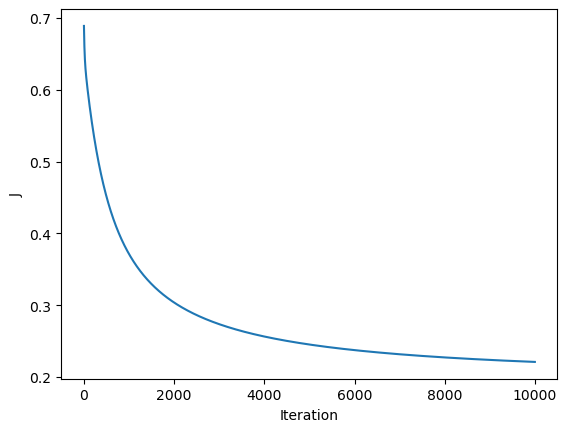

In [13]:

theta, J_history = fit(X, y, alpha=0.1, num_iters=10000, initial_theta=np.zeros((n,1)))

# plot the cost over the iterations stored in J_history

plt.plot(J_history)
plt.xlabel('Iteration')
plt.ylabel('J')

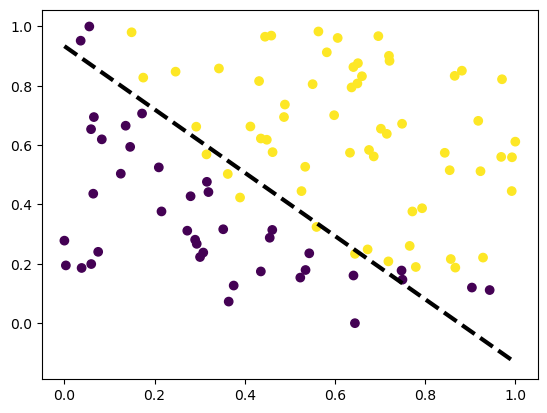

In [14]:
# plot the data points use a scatter plot

plt.scatter(X[:,1],X[:,2],c=y[:,0])


# plot the decision boundary
two_x1 = np.array([0, 1])
two_x2 = -(theta[0] + theta[1] * two_x1) / theta[2]

# plot the decision boundary as a black dashed line
plt.plot(two_x1, two_x2, "k--", linewidth=3)